In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set()

## Decision Boundary in Classification

In [2]:
# Importing the dataset
dataset = pd.read_csv('datasets/apples_and_oranges.csv')
dataset.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [3]:
# No. of apples and oranges
dataset['Class'].value_counts()

Class
orange    20
apple     20
Name: count, dtype: int64

### Encoding Target

In [4]:
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])
le.classes_

array(['apple', 'orange'], dtype=object)

This implies that,
* 0 represents Apple
* 1 represents Orange

In [5]:
dataset.head()

,Weight,Size,Class
0,69,4.39,1
1,69,4.21,1
2,65,4.09,1
3,72,5.85,0
4,67,4.70,1


### Plotting the dataset

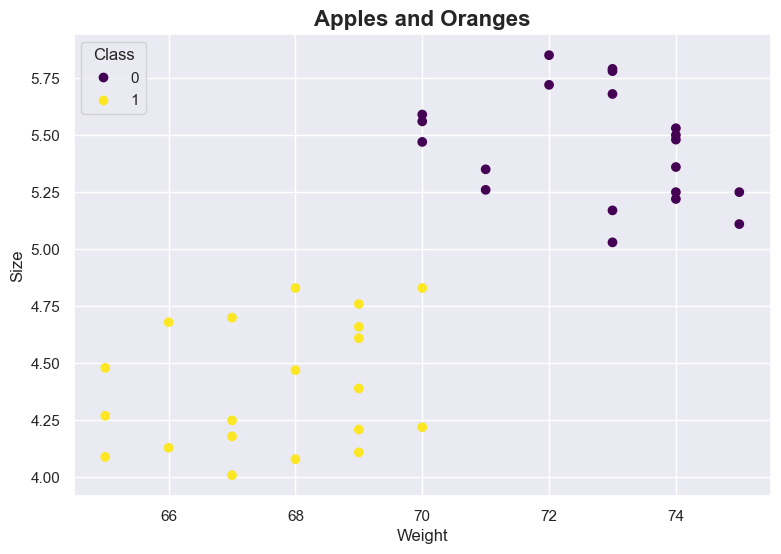

In [6]:
plt.figure(figsize=(9,6))
plt.title('Apples and Oranges', fontweight='bold', fontsize=16)
plt.xlabel('Weight')
plt.ylabel('Size')
scatter = plt.scatter(dataset['Weight'], dataset['Size'], c=dataset['Class'], cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class');

We can observe that oranges have lower weight and size compared to apples. Further by drawing a straight line between these two groups of data points, we can clearly distinguish between apples and oranges.

### Building a Logistic Regression model to distinguish apples and oranges

As we can clearly distinguish between apples and oranges using a straight line decision boundary, we can choose the hypothesis *y = a0 + a1 * x1 + a2 * x2* for Logistic Regression<br>
where,<br>
*a0*, *a1*, *a2* are the fitting parameters<br>
*x1* is Weight<br>
*x2* is Size

In [7]:
# Defining target and features
y = dataset['Class']
x = dataset.drop(columns=['Class'])

In [8]:
# Creating object of LogisticRegression class
log_reg = LogisticRegression()

In [9]:
# Fitting parameters
log_reg.fit(x,y)

LogisticRegression()

In [10]:
# Intercept - a0
log_reg.intercept_

array([106.60287324])

In [11]:
# Coefficients - a1, a2 respectively
log_reg.coef_

array([[-1.42833694, -1.31285258]])

In [12]:
# Predicting labels for the given dataset
label_predictions = log_reg.predict(x)
label_predictions

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

### Linear Decision Boundary with naive features

In [13]:
# Parameter values
a0 = log_reg.intercept_[0]
a1 = log_reg.coef_[0][0]
a2 = log_reg.coef_[0][1]

In [14]:
# Defining x1 and x2 values for decision boundary
x1 = np.array([69, 71])
x2 = (0.5 -a0 - (a1 * x1)) / a2

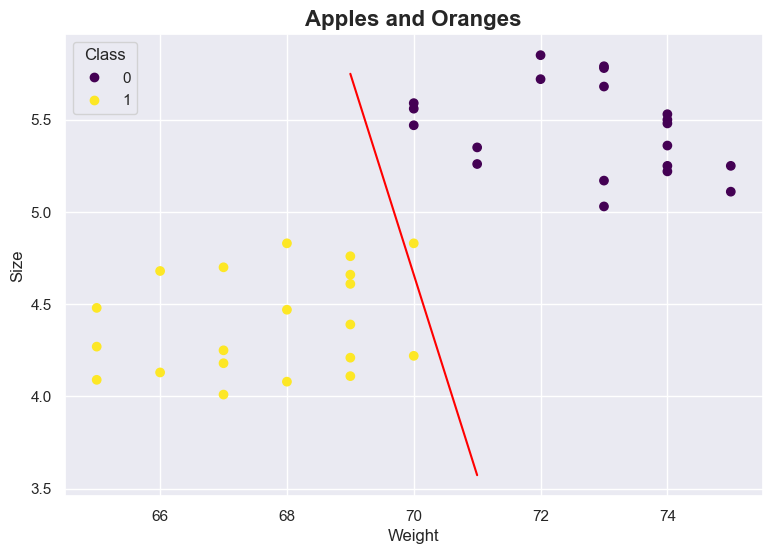

In [15]:
# Plotting the decision boundary
plt.figure(figsize=(9,6))
plt.title('Apples and Oranges', fontweight='bold', fontsize=16)
plt.xlabel('Weight')
plt.ylabel('Size')
scatter = plt.scatter(dataset['Weight'], dataset['Size'], c=dataset['Class'], cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.show()

In this problem, we have just two features x1 and x2, if we use just those as they are we will end up with a straight line which divides our 2D plane into two half-planes. 

## Non-linear Decision Boundary

In some occasions, we want to have a more complex boundary, and we can achieve this by transforming our features, if 
we have features like this $$(x_1, x_2, x_1x_2, x_1^2, x_2^2)$$ 
That is adding interaction terms and polynominal terms (degree = 2), the decision boundary will look like this
![non-linear decision boundary](https://media.licdn.com/dms/image/C4E12AQGkxM-afZdClA/article-inline_image-shrink_1000_1488/0/1520148127787?e=1714003200&v=beta&t=iKSOxG1H4p-d0R6DP9D0oMHGZFfXIhK-IOobSKZdZEc)

For instance, when confronted with a training data distribution as illustrated below, 
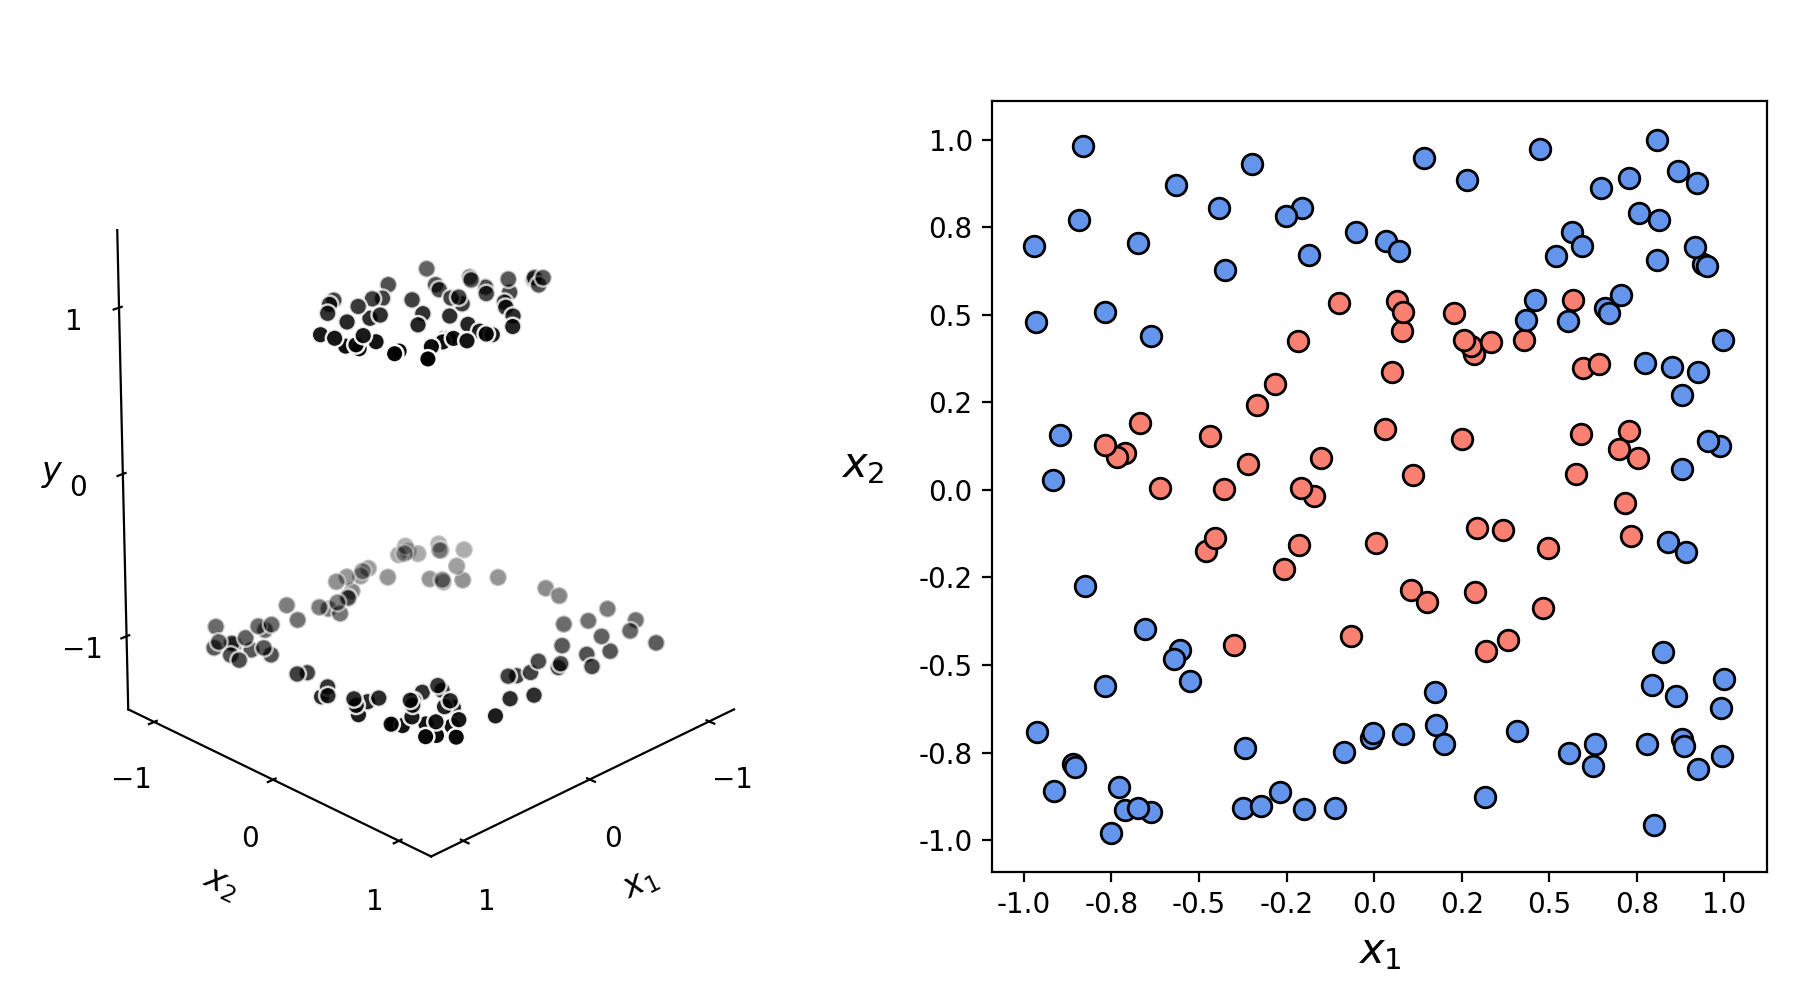
it becomes imperative to generate polynomial features  $$(x_1^2, x_2^2)$$ in order to enhance the delineation between the two classes.
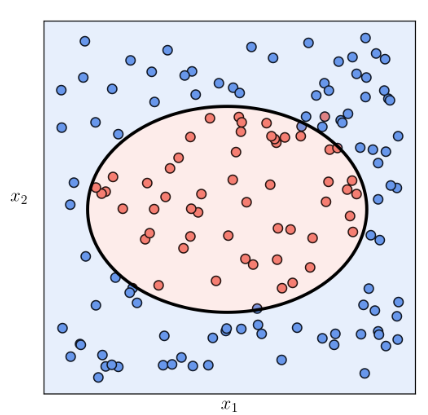


Let's delve into a concrete example below to illustrate this concept.For the purpose of illustrating the decision boundary, I chose not to split the data into training and test sets.

In [16]:
#Load our Dataset for Logistic Regression
components = pd.read_csv('datasets/ex2data2.txt', header=None, names = ['feature 1', 'feature 2', 'faulty'])
components.head()

,feature 1,feature 2,faulty
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [17]:
# check the balance of the dataset
components['faulty'].value_counts()

faulty
0    60
1    58
Name: count, dtype: int64

In [18]:
# get positive and negative samples for plotting
pos = components['faulty'] == 1
neg = components['faulty'] == 0

(-1.0, 1.5)

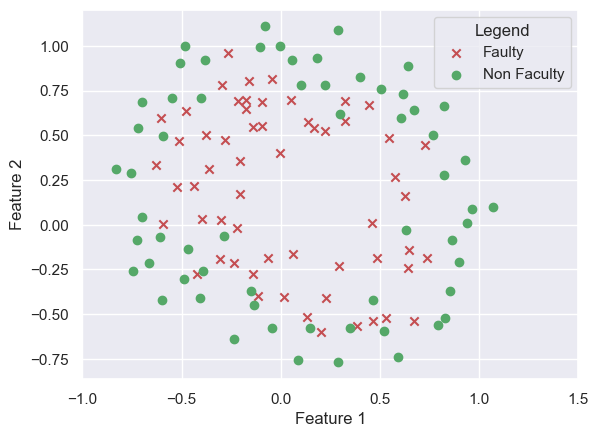

In [19]:
# Visualize Data
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter(components.loc[pos, 'feature 1'], components.loc[pos, 'feature 2'], color = 'r', marker='x', label='Faulty')
axes.scatter(components.loc[neg, 'feature 1'], components.loc[neg, 'feature 2'], color = 'g', marker='o', label='Non Faculty')
axes.legend(title='Legend', loc = 'best' )
axes.set_xlim(-1,1.5)
axes.set_xlim(-1,1.5)

As we can see that the positive and negative examples are not linearly seperable. So we have to add additional higher order polynomial features.

In [20]:
# define function to map higher order polynomial features
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

In [21]:
# Get the features 
X = components.iloc[:, :2]

In [22]:
degree = 2

In [23]:
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)

In [24]:
# Get the target variable
y = components.iloc[:, 2]

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [26]:
def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 

In [27]:
# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

In [30]:
# Now call the optimization routine
#NOTE: This automatically picks the learning rate
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta.flatten(), args=(X_poly, y))

In [31]:
# our optimizated coefficients
theta = res.x

In [32]:
# define a function to plot the decision boundary
def plotDecisionBoundary(theta,degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['Non Faculty', 'faulty', 'Decision Boundary'])
    return cs

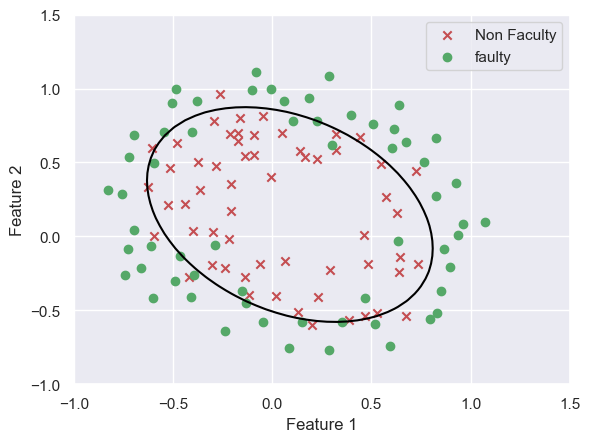

In [34]:
# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter(components.loc[pos, 'feature 1'], components.loc[pos, 'feature 2'], color = 'r', marker='x', label='Faulty')
axes.scatter(components.loc[neg, 'feature 1'], components.loc[neg, 'feature 2'], color = 'g', marker='o', label='Good')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta, degree, axes);

of course, you can increase the degree of the polynomial you want to fit, but the overfitting could become a problem

In [35]:
# set degree = 6
degree = 6
# map features to the degree
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree)
# set initial parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)

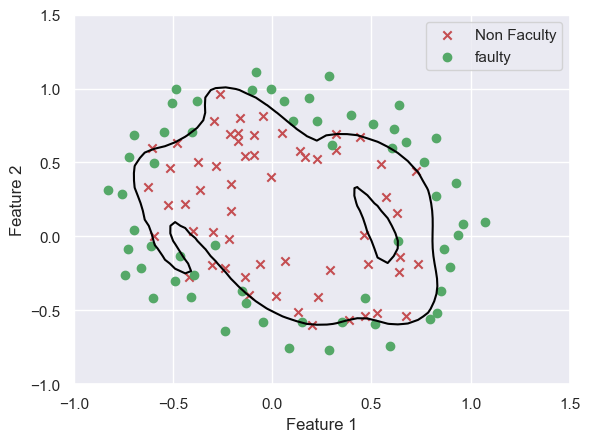

In [37]:
# Run the optimization function
res = minimize(costFunc, initial_theta.flatten(), args=(X_poly, y))
theta = res.x.reshape(res.x.shape[0], 1)

# Plot Decision boundary
fig, axes = plt.subplots()
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter(components.loc[pos, 'feature 1'], components.loc[pos, 'feature 2'], color='r', marker='x', label='Faulty')
axes.scatter(components.loc[neg, 'feature 1'], components.loc[neg, 'feature 2'], color='g', marker='o', label='Good')
#axes.legend(title='Legend', loc='best')

plotDecisionBoundary(theta, degree, axes)

As we can see the model tries pretty hard to capture every single example perfectly and overfits the data.
This kind of model has overfitting issue. i.e The model has not pre-conceived notion about the seperation of the positive and negative examples and pretty much can fit any kind of data.
Such model will fail in predicting the correct classification when it sees new examples.

One of techiques is to use regularization, which we will cover later. The idea is to penalize the algorithm when it tries to overfit by adding a regularization term to the cost function. 

The New Cost function with the regularization is specified as 

$J(\theta ) = \frac{1}{m} \sum_{i=1}^m[-y_i log(h_\theta (z_i) – (1 – y_i) log(1-h_\theta (z_i))] + 
                    \frac{\lambda}{2m} \sum_{j=1}^n[\theta_j^2]$
                    
where $\lambda$ = regularization factor <br>
           n = number of features.
           <br>
 (NOTE: The regularization term does include the intercept term $\theta_0$

### By adding Polynomial Features

In [38]:
components

,feature 1,feature 2,faulty
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [39]:
X = components[['feature 1', 'feature 2']]
y = components['faulty']

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [41]:
feature_names = poly.get_feature_names_out()
print(feature_names)

['1' 'feature 1' 'feature 2' 'feature 1^2' 'feature 1 feature 2'
 'feature 2^2']


In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_poly, y)


LogisticRegression()

In [43]:
label_predictions = model.predict(X_poly)

#### Accuracy Score


In [44]:
accuracy_score(y, label_predictions)

0.8135593220338984

#### Confusion Matrix

In [45]:
cm = confusion_matrix(y, label_predictions)
cm

array([[47, 13],
       [ 9, 49]], dtype=int64)

### By Transforming Continuous Variable
Variable transformation is an important technique to create robust models using logistic regression. Because the predictors are linear in the log of the odds, it is often helpful to transform the continuous variables to create a more linear relationship. To determine the best transformation of a continuous variable, a univariate plot is very helpful. Remember the nice univariate plot of Y variable against X variable in linear regression? This is not easily attained, because Y is dichotomous in logistic regression.

There are different recommended solutions. Among them, 
* One is to create several variations (in forms of squared, cubed, or logged transformations etc.).
* Another solution is to break some continuous variables into segments and treat them as categorical variables. This may work well to pick up nonlinear trends. The biggest drawback is that it loses the benefit of the linear trend relationship in the curve1. It also may lead to over fitting.

In [46]:
train = pd.read_csv('./Datasets/Social_Network_Ads_train.csv') #Develop the model on train data
test = pd.read_csv('./Datasets/Social_Network_Ads_test.csv') #Test the model on test data

In [47]:
train.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15755018,Male,36,33000,0
1,15697020,Female,39,61000,0
2,15796351,Male,36,118000,1
3,15665760,Male,39,122000,1
4,15794661,Female,26,118000,0


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          300 non-null    int64 
 1   Gender           300 non-null    object
 2   Age              300 non-null    int64 
 3   EstimatedSalary  300 non-null    int64 
 4   Purchased        300 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 11.8+ KB


In [49]:
train.Gender.value_counts()

Gender
Female    151
Male      149
Name: count, dtype: int64

In [50]:
tmp_1 = pd.get_dummies(train['Gender'], drop_first=True)
train = pd.concat([train, tmp_1], axis=1)
train.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15755018,Male,36,33000,0,True
1,15697020,Female,39,61000,0,False
2,15796351,Male,36,118000,1,True
3,15665760,Male,39,122000,1,True
4,15794661,Female,26,118000,0,False


In [51]:
tmp_1 = pd.get_dummies(test['Gender'], drop_first=True)
test = pd.concat([test, tmp_1], axis=1)
test.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15810944,Male,35,20000,0,True
1,15668575,Female,26,43000,0,False
2,15603246,Female,27,57000,0,False
3,15694829,Female,32,150000,1,False
4,15697686,Male,29,80000,0,True


In [52]:
# Separating features and target on training set
y_train = train.Purchased
X_train = train.drop(["Purchased", "Gender", "User ID"], axis = 1)

In [53]:
X_train

,Age,EstimatedSalary,Male
0,36,33000,True
1,39,61000,False
2,36,118000,True
3,39,122000,True
4,26,118000,False
...,...,...,...
295,48,96000,False
296,42,149000,True
297,28,79000,True
298,51,134000,False


In [54]:
# Separating features and target on test set
y_test = test.Purchased
X_test = test.drop(["Purchased", "Gender", "User ID"], axis = 1)
X_test

,Age,EstimatedSalary,Male
0,35,20000,True
1,26,43000,False
2,27,57000,False
3,32,150000,False
4,29,80000,True
...,...,...,...
95,49,39000,False
96,47,34000,True
97,60,42000,True
98,39,59000,False


In [55]:
from sklearn.linear_model import LogisticRegression
sklearn_model = LogisticRegression()
sklearn_model.fit(X_train, y_train)

LogisticRegression()

In [56]:

y_pred_test = sklearn_model.predict(X_test)
print('Accuracy of logistic regression on test set : {:.4f}'.format(accuracy_score(y_test, y_pred_test )))

Accuracy of logistic regression on test set : 0.8800


#### Log transformation of salary

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

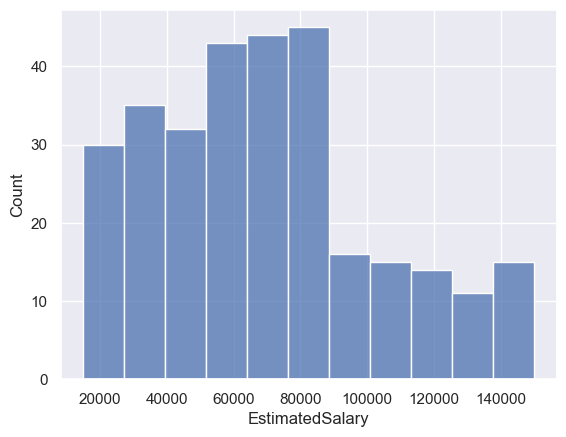

In [57]:

sns.histplot(train.EstimatedSalary)

<Axes: xlabel='log_salary', ylabel='Count'>

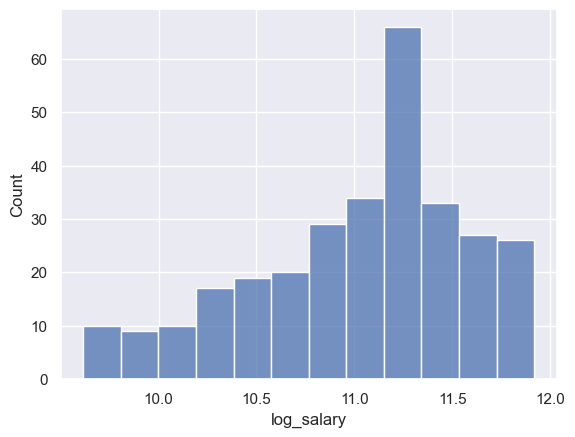

In [58]:
train["log_salary"] = np.log(train["EstimatedSalary"])
sns.histplot(train.log_salary)

The reason for such transformations have nothing to do with their distribution. Instead, the reason has to do with the functional form of the effect. Say we want to know the effect of the number of publications on the probability of getting tenure. It is reasonable to believe that getting an extra publication when one has only 1 publication has more impact compared with getting an extra publication when one has already published 50 articles. The log transformation is one way to capture such a (testable) assumption of diminishing returns.

In [59]:
test["log_salary"] = np.log(test["EstimatedSalary"])

In [60]:
# Separating features and target
y_train = train.Purchased
X_train = train.drop(["Purchased", "Gender", "User ID", "EstimatedSalary"], axis = 1)

In [61]:
X_train

,Age,Male,log_salary
0,36,True,10.404263
1,39,False,11.018629
2,36,True,11.678440
3,39,True,11.711776
4,26,False,11.678440
...,...,...,...
295,48,False,11.472103
296,42,True,11.911702
297,28,True,11.277203
298,51,False,11.805595


In [62]:
from sklearn.linear_model import LogisticRegression
sklearn_model_log = LogisticRegression()
sklearn_model_log.fit(X_train, y_train)

LogisticRegression()

In [63]:
# Separating features and target for the test dataset
y_test_log = test.Purchased
X_test_log = test.drop(["Purchased", "Gender", "User ID", "EstimatedSalary"], axis = 1)

In [64]:
y_log_pred_test = sklearn_model_log.predict(X_test_log)
print('Accuracy of logistic regression after log transformation of salary on test set : {:.4f}'.format(accuracy_score( y_test_log, y_log_pred_test)))

Accuracy of logistic regression after log transformation of salary on test set : 0.8300


###  By Binning Continous Variables

<Axes: xlabel='Age', ylabel='Count'>

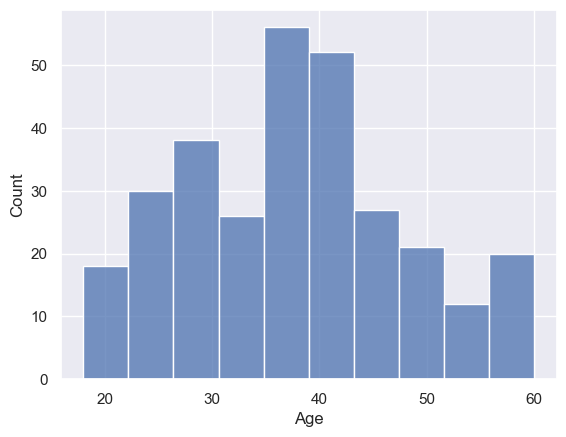

In [65]:
sns.histplot(data=train.Age)

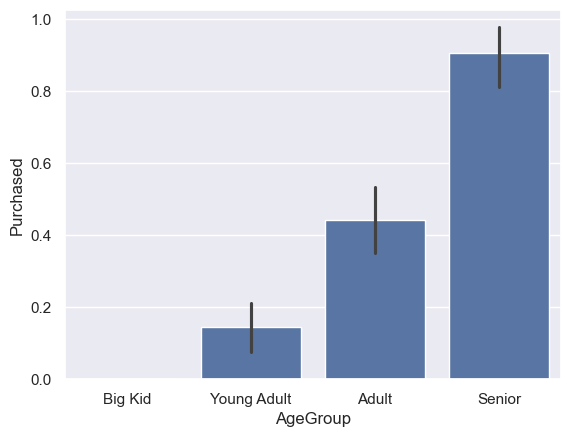

In [66]:
bins = [train.Age.min()-1, 25, 35, 48, train.Age.max()]
labels = ['Big Kid', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Purchased", data=train)
plt.show()

In [67]:
train

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,log_salary,AgeGroup
0,15755018,Male,36,33000,0,True,10.404263,Adult
1,15697020,Female,39,61000,0,False,11.018629,Adult
2,15796351,Male,36,118000,1,True,11.678440,Adult
3,15665760,Male,39,122000,1,True,11.711776,Adult
4,15794661,Female,26,118000,0,False,11.678440,Young Adult
...,...,...,...,...,...,...,...,...
295,15724536,Female,48,96000,1,False,11.472103,Adult
296,15701537,Male,42,149000,1,True,11.911702,Adult
297,15807481,Male,28,79000,0,True,11.277203,Young Adult
298,15603942,Female,51,134000,0,False,11.805595,Senior


In [68]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
train['AgeGroup']= label_encoder.fit_transform(train['AgeGroup']) 
train['AgeGroup'].unique() 

array([0, 3, 1, 2])

In [69]:
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)
test['AgeGroup']= label_encoder.fit_transform(test['AgeGroup']) 

In [70]:
train

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,log_salary,AgeGroup
0,15755018,Male,36,33000,0,True,10.404263,0
1,15697020,Female,39,61000,0,False,11.018629,0
2,15796351,Male,36,118000,1,True,11.678440,0
3,15665760,Male,39,122000,1,True,11.711776,0
4,15794661,Female,26,118000,0,False,11.678440,3
...,...,...,...,...,...,...,...,...
295,15724536,Female,48,96000,1,False,11.472103,0
296,15701537,Male,42,149000,1,True,11.911702,0
297,15807481,Male,28,79000,0,True,11.277203,3
298,15603942,Female,51,134000,0,False,11.805595,2


In [71]:
# Separating features and target on train set
y_train = train.Purchased
X_train = train.drop(["Purchased", "Gender", "User ID", "EstimatedSalary", "Age"], axis = 1)
X_train

,Male,log_salary,AgeGroup
0,True,10.404263,0
1,False,11.018629,0
2,True,11.678440,0
3,True,11.711776,0
4,False,11.678440,3
...,...,...,...
295,False,11.472103,0
296,True,11.911702,0
297,True,11.277203,3
298,False,11.805595,2


In [72]:
from sklearn.linear_model import LogisticRegression
sklearn_model_bin = LogisticRegression()
sklearn_model_bin.fit(X_train, y_train)

LogisticRegression()

In [73]:
# Separating features and target on test set
y_test = test.Purchased
X_test_bin = test.drop(["Purchased", "Gender", "User ID", "EstimatedSalary", "Age"], axis = 1)
X_test_bin

,Male,log_salary,AgeGroup
0,True,9.903488,3
1,False,10.668955,3
2,False,10.950807,3
3,False,11.918391,3
4,True,11.289782,3
...,...,...,...
95,False,10.571317,2
96,True,10.434116,0
97,True,10.645425,2
98,False,10.985293,0


In [74]:
y_bin_pred_test = sklearn_model_bin.predict(X_test_bin)
print('Accuracy of logistic regression after age binning on test set : {:.4f}'.format(accuracy_score( y_test, y_bin_pred_test)))

Accuracy of logistic regression after age binning on test set : 0.7100


## Reference
* https://www.linkedin.com/pulse/generating-non-linear-decision-boundaries-using-logistic-d-urso/
* https://jermwatt.github.io/machine_learning_refined/notes/10_Nonlinear_intro/10_4_Twoclass.html
* https://www.kaggle.com/code/lzs0047/logistic-regression-non-linear-decision-boundary/edit
* https://www.kaggle.com/code/ashishrane7/logistic-regression-non-linear-decision-boundary/notebook
